In [1]:
# Installinh required Libraries
!pip install pymysql

In [3]:
# Establishing a connection for My SQL

import pymysql
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

try:
    # Establish the connection
    conn = pymysql.connect(
        host = '127.0.0.1',
        user = 'root',
        password = 'Reya@2014',
        port = 3306
    )

    # Load data into Data Frame
    query = "SELECT * FROM cars.car_price_dataset"
    df = pd.read_sql(query, conn)

    # Display the results
    print('Connection successful. Here is your data:')
    display(df.head())

except pymysql.Error as e:
    print(f"MySQL Error : {e}")

finally:
    if 'conn' is locals():
        conn.close()
        print ('Connection closed successfully !!!')

<>:30: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:30: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:30: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:30: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?


Connection successful. Here is your data:


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [5]:
# Load the dataset -> We have alreadrey imported the data in "df" from Mysql

In [ ]:
# Importing important libararies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle

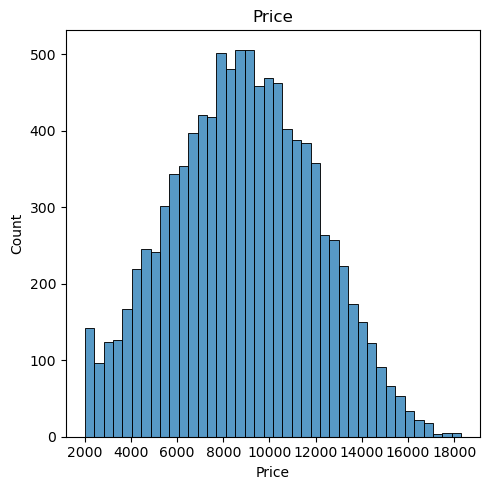

In [8]:
# Plot the distribution of Price across Model
plt.figure(figsize = (5, 5))
sns.histplot(data = df, x = 'Price', palette = 'coolwarm')
plt.title('Price')
plt.xlabel('Price')
plt.tight_layout()
plt.show()

In [11]:
'''''
We can see that Maximum cards are in the range of 6000 to 12000.
'''''

"''\nWe can see that Maximum cards are in the range of 6000 to 12000.\n"

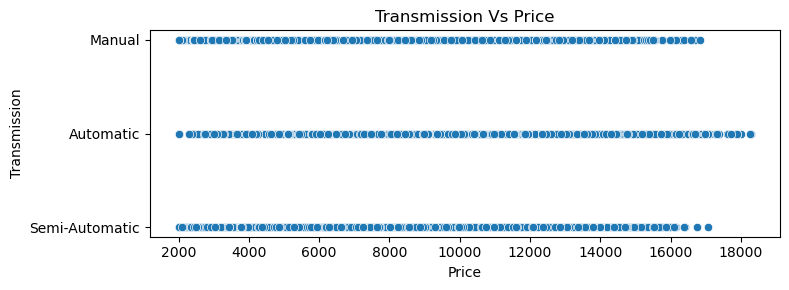

In [13]:
# Transmission Vs Price
plt.figure(figsize = (8,3))
sns.scatterplot(data = df, x = 'Price' , y = 'Transmission')
plt.title('Transmission Vs Price')
plt.tight_layout()
plt.show()

In [15]:
''''
We can see that maximum price can be seen in Automatic but its only marginal by approx 2000
''''

SyntaxError: unterminated string literal (detected at line 3) (4188009014.py, line 3)

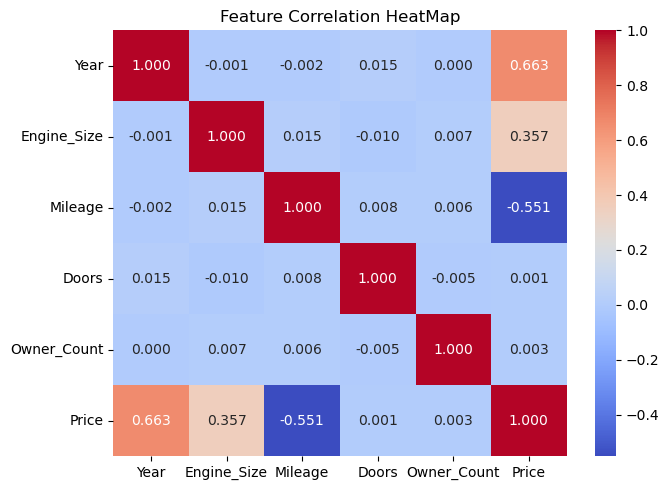

In [17]:
# Correlation Heatmap
plt.figure(figsize = (7, 5))
corr = df.select_dtypes(include = ['number']).corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.3f')
plt.title('Feature Correlation HeatMap')
plt.tight_layout()
plt.show()


In [19]:
'''
1) As we can see there is no correlation between Owner Count, Doors, Milage, Engine Size and year.
2) No correlation between Doors, Owner count, MI;age, Engine Size and year.
3) There is a correlation between the Price and Year,  Price and Engine size and negative correlation between Price and Milage 
'''

'\n1) As we can see there is no correlation between Owner Count, Doors, Milage, Engine Size and year.\n2) No correlation between Doors, Owner count, MI;age, Engine Size and year.\n3) There is a correlation between the Price and Year,  Price and Engine size and negative correlation between Price and Milage \n'

<Figure size 900x300 with 0 Axes>

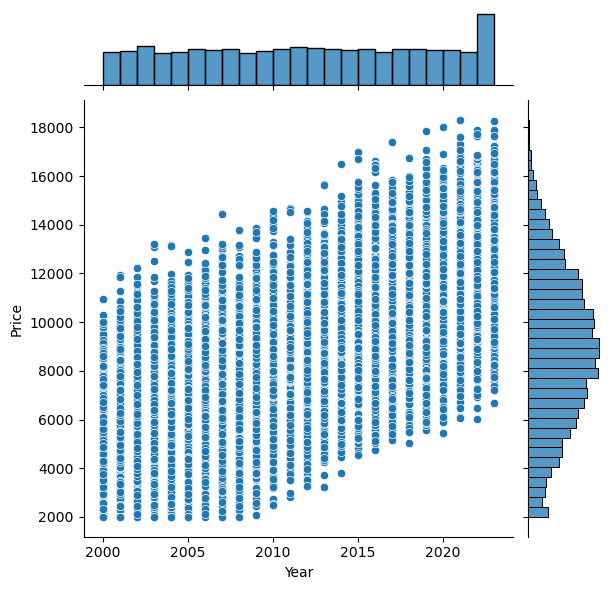

In [21]:
# jointplot() -> Used for analyzing 2 variables along analyzing a single variable as well
plt.figure(figsize = (9, 3))
sns.jointplot( x = 'Year', y = 'Price', data = df, kind = 'scatter')

In [23]:
'''
The above plot shows the increase in Price as the years increased.
'''

'\nThe above plot shows the increase in Price as the years increased.\n'

<Axes: xlabel='Price', ylabel='Brand'>

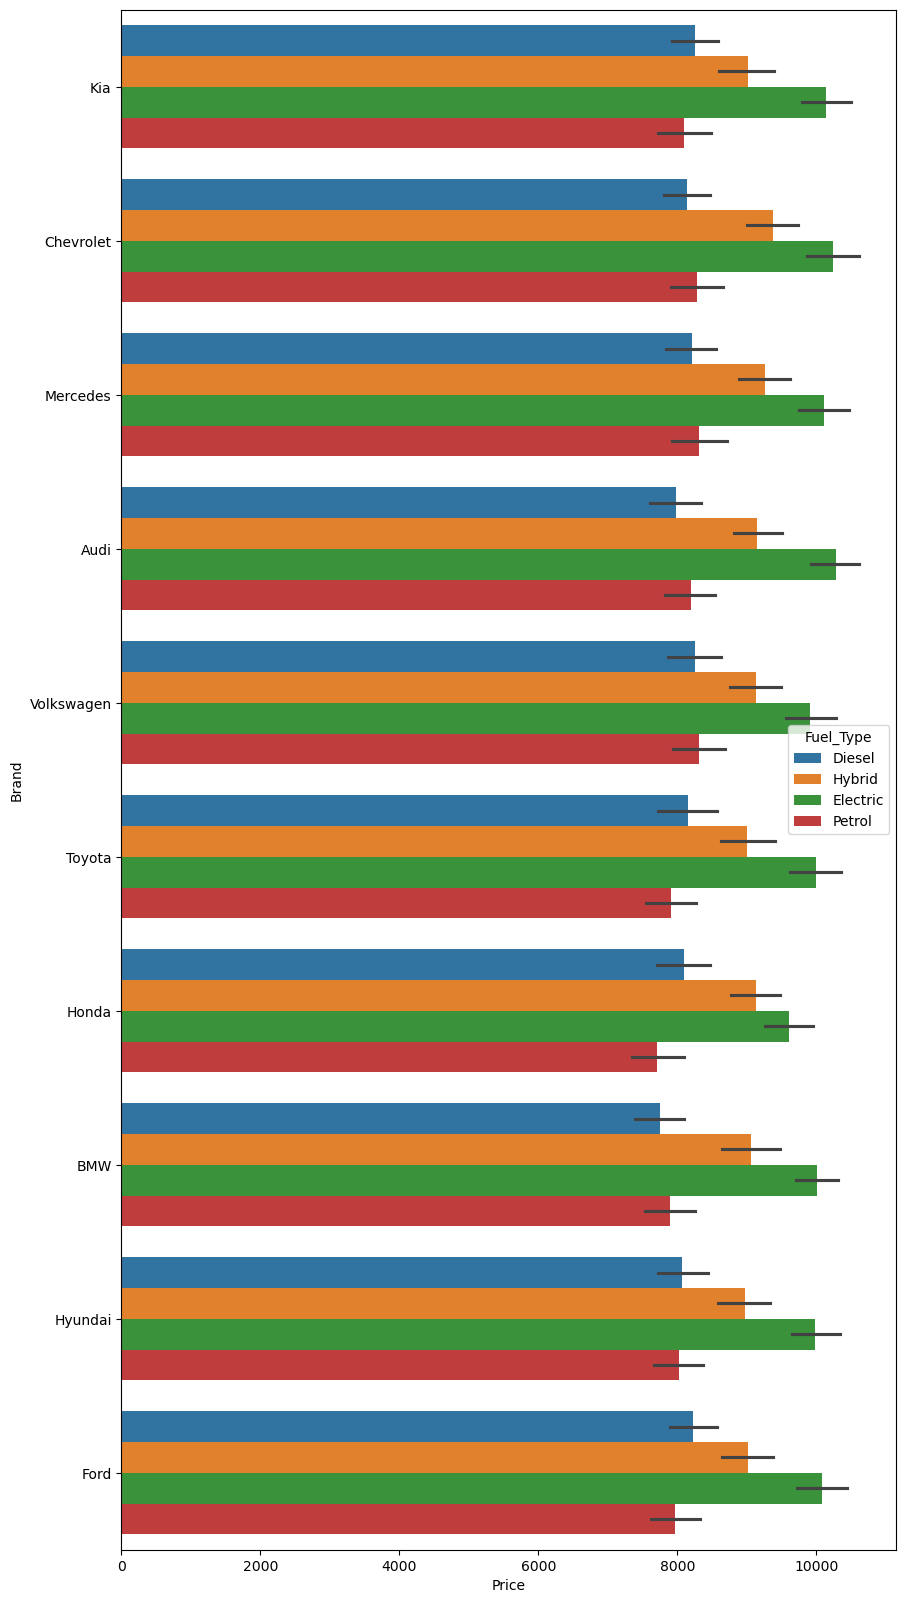

In [25]:
# barplot
plt.figure(figsize = (10, 20))
sns.barplot(x = 'Price', y = 'Brand', hue = 'Fuel_Type', data = df)

In [26]:
''''
1)Price of all Electric cars are in the same price range irrespective of the Brand.
2)Price of all Hyubrid cars are on the same price range irrespective of the Brand.
3)Price of the Petrol cars is slightly higher for BMW, Audi, Kia and Chev
''''

SyntaxError: unterminated string literal (detected at line 5) (4199063654.py, line 5)

In [29]:
# Label Encoding on Categorical Column
label_encoders = {}
for column in df.select_dtypes(include = ['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [31]:
# Getting an idea about the data
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,6,24,2020,4.2,0,1,289944,3,5,8501
1,2,19,2012,2.0,2,0,5356,2,3,12092
2,7,16,2020,4.2,0,0,231440,4,2,11171
3,0,22,2023,2.0,1,1,160971,2,1,11780
4,9,17,2003,2.6,2,2,286618,3,3,2867


In [108]:
# Seperating the input and output features
X = df.drop('Price', axis = 1)
y = df['Price']

In [114]:
# Performing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [118]:
# Creating the model
model = RandomForestRegressor(random_state = 3)

# Fitting the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=3)

In [120]:
# Taking predictions from the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [122]:
# Evaluating the model
print('Training RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 3))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 3))

print('\nTesting RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
print('Testng R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 3))

Training RMSE : 178.773
Training R2 Score : 0.997

Testing RMSE : 475.457
Testng R2 Score : 0.977


In [ ]:
'''''From the above results, we can see that the model is overfitted
We can use GridSearchCV() or RandomizedSearchCV() to improve the model
'''''''

In [124]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Initialize the model
reg = XGBRegressor()

# Step 2: Fit the model on training data
reg.fit(X_train, y_train)

# Step 3: Make predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Step 4: Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Training R² Score:", train_r2)
print("Testing RMSE:", test_rmse)
print("Testing R² Score:", test_r2)


Training RMSE: 127.01069790358979
Training R² Score: 0.9983319640159607
Testing RMSE: 237.9853084784049
Testing R² Score: 0.9941868782043457


In [ ]:
'''''
Even XGBoost Classifer is overfitting
Trying to do hyper-parameter optimization using GridSearchCV()/ RandomsizedCV ()
'''''

In [130]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define the model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Define a scoring function (e.g., RMSE — negative because lower is better)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and RMSE
print("Best parameters found:", grid_search.best_params_)
print("Best CV RMSE:", np.sqrt(-grid_search.best_score_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}
Best CV RMSE: 134.51984731062726


In [132]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Use the best estimator from grid search
best_model = grid_search.best_estimator_

# Step 2: Predict on test set
y_test_pred = best_model.predict(X_test)

# Step 3: Evaluate model performance
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Test RMSE:", test_rmse)
print("Test R² Score:", test_r2)

Test RMSE: 121.3887509829095
Test R² Score: 0.9984875917434692


In [144]:

# Save the best model from GridSearchCV
with open('xgb_best_model.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)